In [1]:
import pandas as pd

# Remove truncation for columns
pd.set_option('display.max_columns', None)

# Remove truncation for rows
pd.set_option('display.max_rows', None)

# Set width to display all columns without wrapping
pd.set_option('display.width', None)

# Increase max column width to show full text in columns
pd.set_option('display.max_colwidth', None)
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

data.shape

C:\Users\Cayden Wong\AppData\Local\Temp\ipykernel_22492\1192385179.py:15: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


(11431, 1779)

In [2]:
data['DATASET'].value_counts()

DATASET
2022 Cross-Sectional    3916
2021 Cross-Sectional    3589
2023 Cross-Sectional    3058
2022 Cohort              493
2023 Cohort              375
Name: count, dtype: int64

In [3]:
data = data[data['DATASET'] == '2023 Cross-Sectional']

In [4]:
def find_columns_by_keyword_and_dtype(keywords):
    
    # Filter further based on keywords in column names
    filtered_columns = [col for col in data.columns if any(keyword in col for keyword in keywords)]
    
    return filtered_columns

# Example usage
keywords = ['three_factor_eating_questionnaire']  # Replace with your desired keywords
matching_columns_e = find_columns_by_keyword_and_dtype(keywords)
data[matching_columns_e].dtypes

NUTRITION_three_factor_eating_questionnaire_eat_when_smell_food                   object
NUTRITION_three_factor_eating_questionnaire_small_helpings_for_weight_control     object
NUTRITION_three_factor_eating_questionnaire_eat_when_anxious                      object
NUTRITION_three_factor_eating_questionnaire_uncontrolled_eating_episodes          object
NUTRITION_three_factor_eating_questionnaire_influenced_eating_by_others           object
NUTRITION_three_factor_eating_questionnaire_overeat_when_sad                      object
NUTRITION_three_factor_eating_questionnaire_immediate_eating_when_see_delicacy    object
NUTRITION_three_factor_eating_questionnaire_bottomless_pit_feeling                object
NUTRITION_three_factor_eating_questionnaire_always_hungry_cant_stop               object
NUTRITION_three_factor_eating_questionnaire_eat_when_lonely                       object
NUTRITION_three_factor_eating_questionnaire_hold_back_to_avoid_weight_gain        object
NUTRITION_three_facto

In [5]:
# Step 1: Remove rows with missing values in the questionnaire columns directly in 'data'
data = data.dropna(subset=matching_columns_e)


# Output the shape of the updated dataset to confirm the number of rows retained
print(f"Data shape after pruning: {data.shape}")

# Verify the updated dataset
print(data[matching_columns_e].info())
data[matching_columns_e].head()

Data shape after pruning: (285, 1779)
<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 35 to 11426
Data columns (total 18 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   NUTRITION_three_factor_eating_questionnaire_eat_when_smell_food                 285 non-null    object
 1   NUTRITION_three_factor_eating_questionnaire_small_helpings_for_weight_control   285 non-null    object
 2   NUTRITION_three_factor_eating_questionnaire_eat_when_anxious                    285 non-null    object
 3   NUTRITION_three_factor_eating_questionnaire_uncontrolled_eating_episodes        285 non-null    object
 4   NUTRITION_three_factor_eating_questionnaire_influenced_eating_by_others         285 non-null    object
 5   NUTRITION_three_factor_eating_questionnaire_overeat_when_sad                    285 non-null    ob

,NUTRITION_three_factor_eating_questionnaire_eat_when_smell_food,NUTRITION_three_factor_eating_questionnaire_small_helpings_for_weight_control,NUTRITION_three_factor_eating_questionnaire_eat_when_anxious,NUTRITION_three_factor_eating_questionnaire_uncontrolled_eating_episodes,NUTRITION_three_factor_eating_questionnaire_influenced_eating_by_others,NUTRITION_three_factor_eating_questionnaire_overeat_when_sad,NUTRITION_three_factor_eating_questionnaire_immediate_eating_when_see_delicacy,NUTRITION_three_factor_eating_questionnaire_bottomless_pit_feeling,NUTRITION_three_factor_eating_questionnaire_always_hungry_cant_stop,NUTRITION_three_factor_eating_questionnaire_eat_when_lonely,NUTRITION_three_factor_eating_questionnaire_hold_back_to_avoid_weight_gain,NUTRITION_three_factor_eating_questionnaire_avoid_fattening_foods,NUTRITION_three_factor_eating_questionnaire_always_hungry_for_any_time,NUTRITION_three_factor_eating_questionnaire_frequency_of_hunger,NUTRITION_three_factor_eating_questionnaire_avoid_tempting_foods_stocking,NUTRITION_three_factor_eating_questionnaire_conscious_eating_restraint,NUTRITION_three_factor_eating_questionnaire_binge_eating_when_not_hungry,NUTRITION_three_factor_eating_questionnaire_restraint_scale_rating
35,Mostly true,Mostly true,Definitely true,Definitely true,Mostly true,Definitely true,Mostly true,Mostly true,Mostly false,Mostly true,Definitely false,Definitely false,Mostly true,Often between meals,Usually,Slightly likely,Sometimes,3.0
92,Definitely true,Mostly true,Definitely true,Definitely true,Mostly false,Mostly true,Mostly false,Mostly true,Definitely true,Mostly true,Mostly true,Mostly true,Mostly true,Often between meals,Almost always,Moderately likely,Never,4.0
101,Mostly false,Definitely false,Definitely true,Mostly true,Mostly true,Definitely true,Definitely true,Definitely false,Definitely false,Mostly false,Definitely false,Definitely false,Definitely false,Sometimes between meals,Almost never,Unlikely,Never,2.0
131,Mostly false,Definitely false,Definitely false,Definitely false,Mostly false,Definitely false,Mostly false,Definitely false,Definitely false,Definitely false,Mostly false,Definitely false,Definitely false,Sometimes between meals,Seldom,Slightly likely,Never,5.0
217,Mostly true,Definitely false,Definitely false,Mostly false,Definitely true,Mostly false,Definitely true,Mostly false,Definitely false,Definitely false,Definitely false,Definitely false,Mostly false,Sometimes between meals,Usually,Slightly likely,Sometimes,2.0


### Scoring the Three-Factor Eating Questionnaire (TFEQ-18) https://www.med.umich.edu/pdf/weight-management/TFEQ-r18.pdf

The **Three-Factor Eating Questionnaire (TFEQ-18)** is a widely used self-report measure designed to assess eating behavior patterns across three main factors:

1. **Cognitive Restraint (CR)**  
   Measures conscious control over food intake, often to control body weight or shape.

2. **Uncontrolled Eating (UE)**  
   Reflects a tendency to lose control over eating when feeling hungry or when exposed to food stimuli.

3. **Emotional Eating (EE)**  
   Captures the tendency to eat in response to emotional states, such as anxiety, sadness, or loneliness.

---

#### Scoring Process
Each of the three factors is calculated by summing up responses to specific items in the questionnaire. The responses are typically on a Likert scale, which is transformed into numerical values for scoring.

---

#### Response to Numerical Mapping
Responses are mapped to numerical values as follows:

| **Response**            | **Score** |
|--------------------------|-----------|
| Definitely false         | 1         |
| Mostly false             | 2         |
| Mostly true              | 3         |
| Definitely true          | 4         |
| Only at meal times       | 1         |
| Sometimes between meals  | 2         |
| Often between meals      | 3         |
| Almost always            | 4         |
| Never                    | 1         |
| Rarely                   | 2         |
| Sometimes                | 3         |
| At least once a week     | 4         |
| Unlikely                 | 1         |
| Slightly likely          | 2         |
| Moderately likely        | 3         |
| Very likely              | 4         |

---

#### Item Mapping to Factors
The items are divided across the three factors as follows:

1. **Cognitive Restraint (CR):**
   - Small helpings for weight control
   - Hold back to avoid weight gain
   - Avoid fattening foods
   - Avoid stocking tempting foods
   - Conscious eating restraint
   - Restraint scale rating

2. **Uncontrolled Eating (UE):**
   - Uncontrolled eating episodes
   - Influenced eating by others
   - Immediate eating when seeing delicacies
   - Bottomless pit feeling
   - Always hungry and can’t stop
   - Always hungry at any time
   - Frequency of hunger
   - Binge eating when not hungry

3. **Emotional Eating (EE):**
   - Eat when smelling food
   - Eat when anxious
   - Overeat when sad
   - Eat when lonely

---

#### Calculating Factor Scores
1. **Score each item** by mapping responses to their numerical values.
2. **Sum the scores** for all items within each factor to calculate the factor’s total score:

Factor Score = Σ (Numerical Values of Items in Factor)

For example:
- If the CR factor includes 6 items and a respondent scores 3, 4, 3, 2, 4, and 3 on these items, the total CR score would be:  
- 3 + 4 + 3 + 2 + 4 + 3 = 19

---

#### Interpreting the Scores
- **Higher scores** indicate a stronger presence of the specific eating behavior.
- **CR:** More conscious restraint over eating.
- **UE:** Higher tendency toward losing control over eating.
- **EE:** Greater emotional influence on eating behaviors.

These scores can then be used as dependent variables in regression models or other analyses to explore their relationships with predictors such as personality traits, health behaviors, or social influences.


In [6]:
def find_columns_by_keyword_and_dtype(keywords):
    
    # Filter further based on keywords in column names
    filtered_columns = [col for col in data.columns if any(keyword in col for keyword in keywords)]
    
    return filtered_columns

# Example usage
keywords = ['score']  # Replace with your desired keywords
matching_columns_n = find_columns_by_keyword_and_dtype(keywords)
data[matching_columns_n].dtypes

PSYCH_zimet_multidimensional_social_support_scale_positive_not_scored            object
PSYCH_zimet_multidimensional_social_support_scale_gets_me_not_scored             object
PSYCH_cope_60_positive_reinterpretation_and_growth_subscale_score               float64
PSYCH_cope_60_mental_disengagement_subscale_score                               float64
PSYCH_cope_60_focus_on_and_venting_of_emotions_subscale_score                   float64
PSYCH_cope_60_use_of_instrumental_social_support_subscale_score                 float64
PSYCH_cope_60_active_coping_subscale_score                                      float64
PSYCH_cope_60_denial_subscale_score                                             float64
PSYCH_cope_60_religious_coping_subscale_score                                   float64
PSYCH_cope_60_humor_subscale_score                                              float64
PSYCH_cope_60_behavioral_disengagement_subscale_score                           float64
PSYCH_cope_60_restraint_subscale

In [7]:
# Step 4: Check for missing responses in predictor variables
missing_data_summary = data[matching_columns_n].isnull().sum()

# Filter variables with more than 50 missing responses
missing_predictors = missing_data_summary[missing_data_summary > 50]

# Output results
print("Predictor variables with more than 50 missing responses:")
print(missing_predictors)

# Retain valid predictors (allowing up to 50 missing responses)
valid_predictors = [col for col in matching_columns_n if col not in missing_predictors.index]

print("\nValid predictors for regression (allowing up to 50 missing responses):")
data[valid_predictors].dtypes




Predictor variables with more than 50 missing responses:
PSYCH_zimet_multidimensional_social_support_scale_positive_not_scored           285
PSYCH_zimet_multidimensional_social_support_scale_gets_me_not_scored            285
PSYCH_cope_60_positive_reinterpretation_and_growth_subscale_score               285
PSYCH_cope_60_mental_disengagement_subscale_score                               285
PSYCH_cope_60_focus_on_and_venting_of_emotions_subscale_score                   285
PSYCH_cope_60_use_of_instrumental_social_support_subscale_score                 285
PSYCH_cope_60_active_coping_subscale_score                                      285
PSYCH_cope_60_denial_subscale_score                                             285
PSYCH_cope_60_religious_coping_subscale_score                                   285
PSYCH_cope_60_humor_subscale_score                                              285
PSYCH_cope_60_behavioral_disengagement_subscale_score                           285
PSYCH_cope_60_restr

HEALTH_hampson_good_health_practices_scale_score                           float64
NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score    float64
NUTRITION_cooking_and_food_provisioning_action_scale_attitude_score        float64
NUTRITION_cooking_and_food_provisioning_action_scale_structure_score       float64
LONELY_dejong_emotional_social_loneliness_scale_score                      float64
LONELY_dejong_emotional_loneliness_sub_scale_score                         float64
LONELY_dejong_social_loneliness_sub_scale_score                            float64
LONELY_dejong_emotional_social_loneliness_scale_score_y_n                   object
LONELY_dejong_emotional_loneliness_sub_scale_score_y_n                      object
LONELY_dejong_social_loneliness_sub_scale_score_y_n                         object
WELLNESS_phq_score                                                         float64
WELLNESS_phq_score_y_n                                                      object
WELL

In [8]:
# Keep a backup of the original dataset
original_data = data.copy()

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# At the start of each run, reset the data
data = original_data.copy()

# Step 5: Score the TFEQ-18 Questionnaire
# Define factor columns
cognitive_restraint_columns = [
    'NUTRITION_three_factor_eating_questionnaire_small_helpings_for_weight_control',
    'NUTRITION_three_factor_eating_questionnaire_hold_back_to_avoid_weight_gain',
    'NUTRITION_three_factor_eating_questionnaire_avoid_fattening_foods',
    'NUTRITION_three_factor_eating_questionnaire_avoid_tempting_foods_stocking',
    'NUTRITION_three_factor_eating_questionnaire_conscious_eating_restraint',
    'NUTRITION_three_factor_eating_questionnaire_restraint_scale_rating'
]

uncontrolled_eating_columns = [
    'NUTRITION_three_factor_eating_questionnaire_uncontrolled_eating_episodes',
    'NUTRITION_three_factor_eating_questionnaire_influenced_eating_by_others',
    'NUTRITION_three_factor_eating_questionnaire_immediate_eating_when_see_delicacy',
    'NUTRITION_three_factor_eating_questionnaire_bottomless_pit_feeling',
    'NUTRITION_three_factor_eating_questionnaire_always_hungry_cant_stop',
    'NUTRITION_three_factor_eating_questionnaire_always_hungry_for_any_time',
    'NUTRITION_three_factor_eating_questionnaire_frequency_of_hunger',
    'NUTRITION_three_factor_eating_questionnaire_binge_eating_when_not_hungry'
]

emotional_eating_columns = [
    'NUTRITION_three_factor_eating_questionnaire_eat_when_smell_food',
    'NUTRITION_three_factor_eating_questionnaire_eat_when_anxious',
    'NUTRITION_three_factor_eating_questionnaire_overeat_when_sad',
    'NUTRITION_three_factor_eating_questionnaire_eat_when_lonely'
]

# Assign scores to Likert responses
def assign_scores(row):
    mapping = {
        "Definitely false": 1,
        "Mostly false": 2,
        "Mostly true": 3,
        "Definitely true": 4,
        "Only at meal times": 1,
        "Sometimes between meals": 2,
        "Often between meals": 3,
        "Almost always": 4,
        "Never": 1,
        "Rarely": 2,
        "Sometimes": 3,
        "At least once a week": 4,
        "Unlikely": 1,
        "Slightly likely": 2,
        "Moderately likely": 3,
        "Very likely": 4
    }
    return mapping.get(row, 0)

# Only apply scoring if not already scored
if data[cognitive_restraint_columns[0]].dtype == 'object':
    for col in cognitive_restraint_columns + uncontrolled_eating_columns + emotional_eating_columns:
        data[col] = data[col].apply(assign_scores)

# Calculate factor scores
data['Cognitive_Restraint'] = data[cognitive_restraint_columns].sum(axis=1)
data['Uncontrolled_Eating'] = data[uncontrolled_eating_columns].sum(axis=1)
data['Emotional_Eating'] = data[emotional_eating_columns].sum(axis=1)

# Step 1: Define the selected predictors
selected_predictors = [
    "LONELY_dejong_emotional_social_loneliness_scale_score",
    "PSYCH_social_interactions_anxiety_scale_score",
    "PSYCH_social_phobia_scale_score",
    "PSYCH_big_five_inventory_agreeable_score",                                    
    "PSYCH_big_five_inventory_conscientious_score",                              
    "PSYCH_big_five_inventory_extraverted_score" ,                                
    "PSYCH_big_five_inventory_neurotic_score" ,                                    
    "PSYCH_big_five_inventory_open_score" , 
]

# Step 2: Filter the data to include only rows without missing values for the selected predictors and dependent variables
required_columns = selected_predictors + ['Cognitive_Restraint', 'Uncontrolled_Eating', 'Emotional_Eating']
data_cleaned = data.dropna(subset=required_columns)

# Confirm the shape of the cleaned dataset
print(f"Data shape after cleaning: {data_cleaned.shape}")

# Step 3: Run regression models on cleaned data
# Define formulas for the regression models
formula_cr = f"Cognitive_Restraint ~ {' + '.join(selected_predictors)}"
formula_ue = f"Uncontrolled_Eating ~ {' + '.join(selected_predictors)}"
formula_ee = f"Emotional_Eating ~ {' + '.join(selected_predictors)}"

# Fit the models
model_cr = smf.ols(formula=formula_cr, data=data_cleaned).fit()
model_ue = smf.ols(formula=formula_ue, data=data_cleaned).fit()
model_ee = smf.ols(formula=formula_ee, data=data_cleaned).fit()

# Step 4: Output the regression summaries
print("\nCognitive Restraint Model Summary:")
print(model_cr.summary())

print("\nUncontrolled Eating Model Summary:")
print(model_ue.summary())

print("\nEmotional Eating Model Summary:")
print(model_ee.summary())


Data shape after cleaning: (254, 1782)

Cognitive Restraint Model Summary:
                             OLS Regression Results                            
Dep. Variable:     Cognitive_Restraint   R-squared:                       0.039
Model:                             OLS   Adj. R-squared:                  0.008
Method:                  Least Squares   F-statistic:                     1.250
Date:                 Sun, 17 Nov 2024   Prob (F-statistic):              0.271
Time:                         16:09:24   Log-Likelihood:                -667.39
No. Observations:                  254   AIC:                             1353.
Df Residuals:                      245   BIC:                             1385.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
---

In [10]:
data_cleaned.shape

(254, 1782)

In [22]:
data.shape

(285, 1782)

In [26]:
for index, row in data_cleaned.iterrows():
    print(f"{index}:{row['UNIQUE_id']}")

35:cscs_00036
92:cscs_00093
101:cscs_00103
131:cscs_00134
217:cscs_00225
346:cscs_00367
362:cscs_00383
428:cscs_00446
527:cscs_00551
553:cscs_00578
563:cscs_00590
607:cscs_00633
631:cscs_00651
634:cscs_00654
638:cscs_00658
737:cscs_00760
799:cscs_00827
810:cscs_00841
892:cscs_00926
926:cscs_00966
946:cscs_00987
969:cscs_01014
972:cscs_01017
1069:cscs_01115
1155:cscs_01200
1240:cscs_01282
1287:cscs_01330
1312:cscs_01358
1322:cscs_01368
1443:cscs_01489
1448:cscs_01495
1454:cscs_01501
1505:cscs_01561
1510:cscs_01567
1512:cscs_01569
1563:cscs_01619
1653:cscs_01711
1703:cscs_01755
1745:cscs_01805
1758:cscs_01818
1799:cscs_01863
2036:cscs_02099
2139:cscs_02215
2141:cscs_02218
2205:cscs_02282
2209:cscs_02286
2254:cscs_02329
2269:cscs_02346
2360:cscs_02440
2470:cscs_02552
2543:cscs_02631
2558:cscs_02648
2566:cscs_02656
2588:cscs_02680
2605:cscs_02697
2643:cscs_02738
2680:cscs_02772
2701:cscs_02796
2711:cscs_02808
2725:cscs_02821
2771:cscs_02867
2866:cscs_02958
2915:cscs_03005
2918:cscs_03008
2

In [11]:
model_cr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Cognitive_Restraint   R-squared:                       0.039
Model:                             OLS   Adj. R-squared:                  0.008
Method:                  Least Squares   F-statistic:                     1.250
Date:                 Sun, 17 Nov 2024   Prob (F-statistic):              0.271
Time:                         16:09:24   Log-Likelihood:                -667.39
No. Observations:                  254   AIC:                             1353.
Df Residuals:                      245   BIC:                             1385.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 6.3114      2.675      2.359      0.019       1.042      11.581
LONELY_dejong_emotional_social_loneliness_scale_score     0.1338      0.135      0.987      0.324      -0.133       0.401
PSYCH_social_interactions_anxiety_scale_score             0.0660      0.062      1.061      0.290      -0.057       0.189
PSYCH_social_phobia_scale_score                          -0.1426      0.057     -2.519      0.012      -0.254      -0.031
PSYCH_big_five_inventory_agreeable_score                 -0.0028      0.044     -0.065      0.948      -0.089       0.083
PSYCH_big_five_inventory_conscientious_score              0.0437      0.036      1.231      0.220      -0.026       0.114
PSYCH_big_five_inventory_extraverted_score               -0.0110      0.042     -0.260      0.795      -0.094       0.072
PSYCH_big_five_inventory_neurotic_score                  -0.0069      0.041     -0.170      0.865      -0.087       0.073
PSYCH_big_five_inventory_open_score                       0.0304      0.035      0.859      0.391      -0.039       0.100
==============================================================================
Omnibus:                       22.615   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.892
Skew:                           0.750   Prob(JB):                     2.39e-06
Kurtosis:                       3.445   Cond. No.                         875.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model_ue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Uncontrolled_Eating   R-squared:                       0.164
Model:                             OLS   Adj. R-squared:                  0.136
Method:                  Least Squares   F-statistic:                     5.993
Date:                 Sun, 17 Nov 2024   Prob (F-statistic):           4.96e-07
Time:                         16:09:24   Log-Likelihood:                -737.38
No. Observations:                  254   AIC:                             1493.
Df Residuals:                      245   BIC:                             1525.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                22.3397      3.524      6.339      0.000      15.398      29.281
LONELY_dejong_emotional_social_loneliness_scale_score     0.2769      0.178      1.552      0.122      -0.075       0.628
PSYCH_social_interactions_anxiety_scale_score             0.0089      0.082      0.108      0.914      -0.153       0.170
PSYCH_social_phobia_scale_score                           0.0779      0.075      1.044      0.297      -0.069       0.225
PSYCH_big_five_inventory_agreeable_score                 -0.0186      0.057     -0.325      0.745      -0.132       0.094
PSYCH_big_five_inventory_conscientious_score             -0.1631      0.047     -3.484      0.001      -0.255      -0.071
PSYCH_big_five_inventory_extraverted_score                0.0416      0.056      0.746      0.457      -0.068       0.151
PSYCH_big_five_inventory_neurotic_score                   0.0612      0.054      1.142      0.255      -0.044       0.167
PSYCH_big_five_inventory_open_score                      -0.1148      0.047     -2.460      0.015      -0.207      -0.023
==============================================================================
Omnibus:                        6.055   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                5.792
Skew:                           0.324   Prob(JB):                       0.0552
Kurtosis:                       3.358   Cond. No.                         875.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model_ee.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Emotional_Eating   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     5.981
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           5.15e-07
Time:                        16:09:24   Log-Likelihood:                -648.47
No. Observations:                 254   AIC:                             1315.
Df Residuals:                     245   BIC:                             1347.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 7.6565      2.483      3.083      0.002       2.765      12.548
LONELY_dejong_emotional_social_loneliness_scale_score     0.2797      0.126      2.224      0.027       0.032       0.527
PSYCH_social_interactions_anxiety_scale_score            -0.0098      0.058     -0.170      0.866      -0.124       0.104
PSYCH_social_phobia_scale_score                          -0.0120      0.053     -0.229      0.819      -0.116       0.091
PSYCH_big_five_inventory_agreeable_score                  0.0239      0.040      0.593      0.554      -0.056       0.103
PSYCH_big_five_inventory_conscientious_score             -0.0895      0.033     -2.714      0.007      -0.154      -0.025
PSYCH_big_five_inventory_extraverted_score                0.0116      0.039      0.295      0.768      -0.066       0.089
PSYCH_big_five_inventory_neurotic_score                   0.1213      0.038      3.212      0.001       0.047       0.196
PSYCH_big_five_inventory_open_score                      -0.0150      0.033     -0.456      0.649      -0.080       0.050
==============================================================================
Omnibus:                       17.202   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.150
Skew:                          -0.134   Prob(JB):                       0.0280
Kurtosis:                       2.223   Cond. No.                         875.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Check for NaN in predictors
missing_predictors_check = data[selected_predictors].isnull().sum()

print("Missing values in predictors:")
print(missing_predictors_check)

# If there are missing values, summarize them
if missing_predictors_check.sum() > 0:
    print("\nVariables with missing values:")
    print(missing_predictors_check[missing_predictors_check > 0])
else:
    print("\nNo missing values found in predictors.")


Missing values in predictors:
LONELY_dejong_emotional_social_loneliness_scale_score     3
PSYCH_social_interactions_anxiety_scale_score            10
PSYCH_social_phobia_scale_score                           7
PSYCH_big_five_inventory_agreeable_score                  5
PSYCH_big_five_inventory_conscientious_score              4
PSYCH_big_five_inventory_extraverted_score                3
PSYCH_big_five_inventory_neurotic_score                   6
PSYCH_big_five_inventory_open_score                       7
dtype: int64

Variables with missing values:
LONELY_dejong_emotional_social_loneliness_scale_score     3
PSYCH_social_interactions_anxiety_scale_score            10
PSYCH_social_phobia_scale_score                           7
PSYCH_big_five_inventory_agreeable_score                  5
PSYCH_big_five_inventory_conscientious_score              4
PSYCH_big_five_inventory_extraverted_score                3
PSYCH_big_five_inventory_neurotic_score                   6
PSYCH_big_five_inventory_

In [15]:
import pandas as pd

# Setting pandas display options to avoid truncation
pd.set_option('display.max_colwidth', None)

# Function to filter by new_var and display text and dataset columns
def get_var_details(var_name):
    # Filter the DataFrame for the specified new_var
    filtered_data = cols[cols['new_var'] == var_name]
    
    # Check if the variable exists in the dataset
    if not filtered_data.empty:
        # Select only the new_var, text, and dataset columns
        result = filtered_data[['new_var', 'text', 'dataset']]
        # Format the output as a single string
        formatted_result = ""
        for _, row in result.iterrows():
            formatted_result += f"new_var: {row['new_var']} | text: {row['text']} | dataset: {row['dataset']}\n"
        return formatted_result.strip()  # Return without the trailing newline
    else:
        return "Variable not found."

# Example usage
print(get_var_details('WELLNESS_phq_score'))

Variable not found.


### Narrowing the focus

Within the "cr" model, there is statistical evidence for slight correlation between 'PSYCH_social_phobia_scale_score' and 'Cognitive_Restraint'

Within the "ue" model, there is strong statistical evidence for slight correlation between 'PSYCH_big_five_inventory_conscientious_score + PSYCH_big_five_inventory_open_score' and 'Uncontrolled_Eating'

Within the "ue" model, there is strong statistical evidence for slight correlation between 'PSYCH_big_five_inventory_neurotic_score + PSYCH_big_five_inventory_conscientious_score' and 'Emotional_Eating'


In [16]:
narrow_model_cr = smf.ols("Cognitive_Restraint ~ PSYCH_social_phobia_scale_score", data=data_cleaned).fit()
narrow_model_cr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Cognitive_Restraint   R-squared:                       0.020
Model:                             OLS   Adj. R-squared:                  0.016
Method:                  Least Squares   F-statistic:                     5.015
Date:                 Sun, 17 Nov 2024   Prob (F-statistic):             0.0260
Time:                         16:09:24   Log-Likelihood:                -669.97
No. Observations:                  254   AIC:                             1344.
Df Residuals:                      252   BIC:                             1351.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           9.0516      0.274     33.015      0.000       8.512       9.592
PSYCH_social_phobia_scale_score    -0.0896      0.040     -2.239      0.026      -0.168      -0.011
==============================================================================
Omnibus:                       24.791   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.985
Skew:                           0.795   Prob(JB):                     5.08e-07
Kurtosis:                       3.460   Cond. No.                         8.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

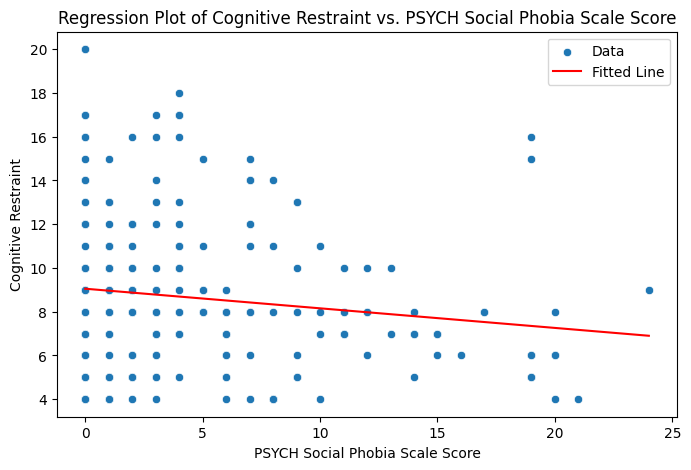

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot with regression line
plt.figure(figsize=(8, 5))

# Plot the actual data points
sns.scatterplot(
    x=data_cleaned['PSYCH_social_phobia_scale_score'],
    y=data_cleaned['Cognitive_Restraint'],
    label='Data'
)

# Predicted values using the fitted model
x_vals = np.linspace(data_cleaned['PSYCH_social_phobia_scale_score'].min(), 
                     data_cleaned['PSYCH_social_phobia_scale_score'].max(), 
                     100)
y_vals = narrow_model_cr.params['Intercept'] + narrow_model_cr.params['PSYCH_social_phobia_scale_score'] * x_vals

# Plot the regression line
plt.plot(x_vals, y_vals, color='red', label='Fitted Line')

plt.xlabel('PSYCH Social Phobia Scale Score')
plt.ylabel('Cognitive Restraint')
plt.title('Regression Plot of Cognitive Restraint vs. PSYCH Social Phobia Scale Score')
plt.legend()
plt.show()


In [18]:
narrow_model_ue = smf.ols("Uncontrolled_Eating ~ PSYCH_big_five_inventory_open_score * PSYCH_big_five_inventory_conscientious_score", data=data_cleaned).fit()
narrow_model_ue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Uncontrolled_Eating   R-squared:                       0.128
Model:                             OLS   Adj. R-squared:                  0.118
Method:                  Least Squares   F-statistic:                     12.26
Date:                 Sun, 17 Nov 2024   Prob (F-statistic):           1.66e-07
Time:                         16:09:25   Log-Likelihood:                -742.65
No. Observations:                  254   AIC:                             1493.
Df Residuals:                      250   BIC:                             1507.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
====================================================================================================================================================
                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                           39.6876      9.156      4.335      0.000      21.655      57.720
PSYCH_big_five_inventory_open_score                                                 -0.4186      0.224     -1.870      0.063      -0.859       0.022
PSYCH_big_five_inventory_conscientious_score                                        -0.5977      0.286     -2.093      0.037      -1.160      -0.035
PSYCH_big_five_inventory_open_score:PSYCH_big_five_inventory_conscientious_score     0.0094      0.007      1.350      0.178      -0.004       0.023
==============================================================================
Omnibus:                        9.168   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.159
Skew:                           0.453   Prob(JB):                       0.0103
Kurtosis:                       3.208   Cond. No.                     4.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
import plotly.graph_objects as go
import numpy as np

# Preparing data
x1 = data_cleaned['PSYCH_big_five_inventory_open_score']
x2 = data_cleaned['PSYCH_big_five_inventory_conscientious_score']
y = data_cleaned['Uncontrolled_Eating']

# Generating a meshgrid for surface
x1_vals = np.linspace(x1.min(), x1.max(), 50)
x2_vals = np.linspace(x2.min(), x2.max(), 50)
x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)

# Predicted values using the fitted model parameters
y_mesh = (narrow_model_ue.params['Intercept'] + 
          narrow_model_ue.params['PSYCH_big_five_inventory_open_score'] * x1_mesh + 
          narrow_model_ue.params['PSYCH_big_five_inventory_conscientious_score'] * x2_mesh +
          narrow_model_ue.params['PSYCH_big_five_inventory_open_score:PSYCH_big_five_inventory_conscientious_score'] * x1_mesh * x2_mesh)

# Creating an interactive 3D surface plot
fig = go.Figure()

# Adding the surface
fig.add_trace(go.Surface(z=y_mesh, x=x1_vals, y=x2_vals, colorscale='viridis', opacity=0.7))

# Adding data points
fig.add_trace(go.Scatter3d(
    x=x1,
    y=x2,
    z=y,
    mode='markers',
    marker=dict(size=4, color='red', opacity=0.8),
    name='Data Points'
))

# Updating layout for better visualization
fig.update_layout(
    title='Interactive 3D Surface Plot of Uncontrolled Eating',
    scene=dict(
        xaxis_title='Open Score',
        yaxis_title='Conscientious Score',
        zaxis_title='Uncontrolled Eating'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


In [20]:
narrow_additive_model_ue = smf.ols("Uncontrolled_Eating ~ PSYCH_big_five_inventory_open_score + PSYCH_big_five_inventory_conscientious_score", data=data_cleaned).fit()
narrow_additive_model_ue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Uncontrolled_Eating   R-squared:                       0.122
Model:                             OLS   Adj. R-squared:                  0.115
Method:                  Least Squares   F-statistic:                     17.41
Date:                 Sun, 17 Nov 2024   Prob (F-statistic):           8.28e-08
Time:                         16:09:26   Log-Likelihood:                -743.58
No. Observations:                  254   AIC:                             1493.
Df Residuals:                      251   BIC:                             1504.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       27.6759      2.166     12.780      0.000      23.411      31.941
PSYCH_big_five_inventory_open_score             -0.1223      0.044     -2.784      0.006      -0.209      -0.036
PSYCH_big_five_inventory_conscientious_score    -0.2165      0.043     -5.012      0.000      -0.302      -0.131
==============================================================================
Omnibus:                       10.426   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.530
Skew:                           0.480   Prob(JB):                      0.00517
Kurtosis:                       3.269   Cond. No.                         389.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

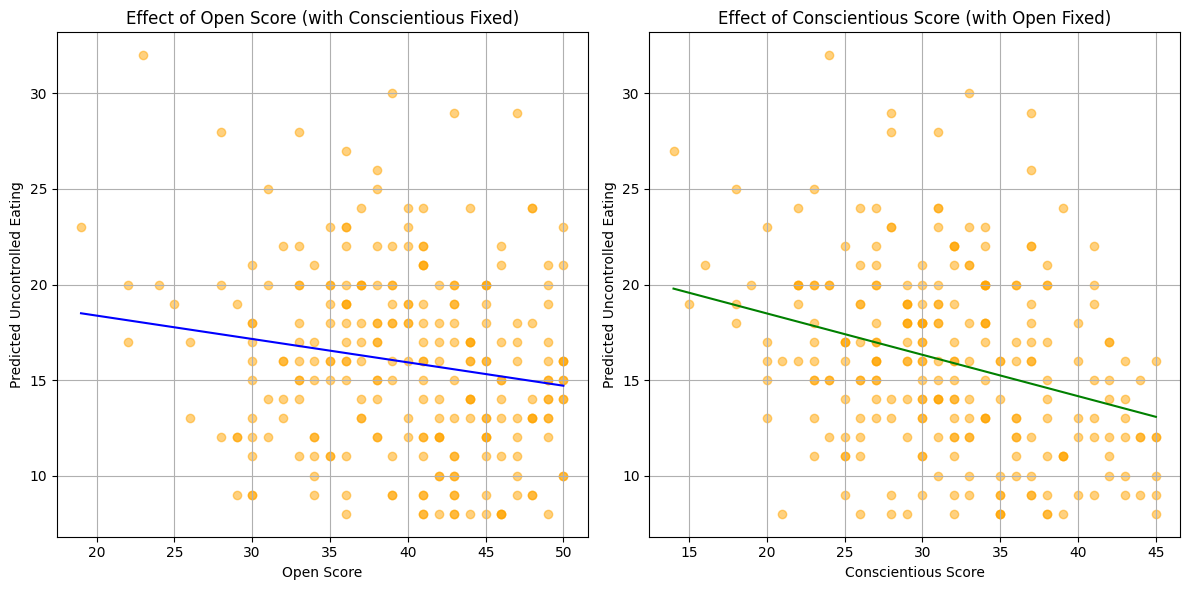

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting up values for predictions
mean_conscientious = data_cleaned['PSYCH_big_five_inventory_conscientious_score'].mean()
mean_open = data_cleaned['PSYCH_big_five_inventory_open_score'].mean()

# Generate range of values for predictions
x1_vals = np.linspace(data_cleaned['PSYCH_big_five_inventory_open_score'].min(), 
                      data_cleaned['PSYCH_big_five_inventory_open_score'].max(), 100)
x2_vals = np.linspace(data_cleaned['PSYCH_big_five_inventory_conscientious_score'].min(), 
                      data_cleaned['PSYCH_big_five_inventory_conscientious_score'].max(), 100)

# Predicted values when varying `PSYCH_big_five_inventory_open_score` while keeping `conscientious_score` constant
y_open_fixed = (narrow_additive_model_ue.params['Intercept'] + 
                narrow_additive_model_ue.params['PSYCH_big_five_inventory_open_score'] * x1_vals + 
                narrow_additive_model_ue.params['PSYCH_big_five_inventory_conscientious_score'] * mean_conscientious)

# Predicted values when varying `PSYCH_big_five_inventory_conscientious_score` while keeping `open_score` constant
y_conscientious_fixed = (narrow_additive_model_ue.params['Intercept'] + 
                         narrow_additive_model_ue.params['PSYCH_big_five_inventory_open_score'] * mean_open + 
                         narrow_additive_model_ue.params['PSYCH_big_five_inventory_conscientious_score'] * x2_vals)

# Plotting
plt.figure(figsize=(12, 6))

# Plot 1: Varying `open_score`
plt.subplot(1, 2, 1)
sns.lineplot(x=x1_vals, y=y_open_fixed, color='blue')
plt.scatter(data_cleaned['PSYCH_big_five_inventory_open_score'], 
            data_cleaned['Uncontrolled_Eating'], alpha=0.5, color='orange')
plt.xlabel('Open Score')
plt.ylabel('Predicted Uncontrolled Eating')
plt.title('Effect of Open Score (with Conscientious Fixed)')
plt.grid(True)

# Plot 2: Varying `conscientious_score`
plt.subplot(1, 2, 2)
sns.lineplot(x=x2_vals, y=y_conscientious_fixed, color='green')
plt.scatter(data_cleaned['PSYCH_big_five_inventory_conscientious_score'], 
            data_cleaned['Uncontrolled_Eating'], alpha=0.5, color='orange')
plt.xlabel('Conscientious Score')
plt.ylabel('Predicted Uncontrolled Eating')
plt.title('Effect of Conscientious Score (with Open Fixed)')
plt.grid(True)

plt.tight_layout()
plt.show()
